In [20]:

# https://www.kaggle.com/ternaryrealm/lstm-time-series-explorations-with-keras
# https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/
    
import sys
import math

# !{sys.executable} -m pip install --upgrade pip

try:
    import numpy as np
except ModuleNotFoundError:
    !{sys.executable} -m pip install numpy
    import numpy as np
    

try:
    import pandas as pd
except ModuleNotFoundError:
    !{sys.executable} -m pip install pandas
    import pandas as pd

    
try:
    import matplotlib
    import matplotlib.pyplot as plt
except ModuleNotFoundError:
    !{sys.executable} -m pip install matplotlib
    import matplotlib.pyplot as plt

    
try:
    import scipy
    import scipy.io
except ModuleNotFoundError:
    !{sys.executable} -m pip install scipy
    import scipy

        
try:
    import sklearn
except ModuleNotFoundError:
    !{sys.executable} -m pip install sklearn
    import sklearn

        
try:
    import keras
except ModuleNotFoundError:
    !{sys.executable} -m pip install keras
    import keras
    

try:
    import keras_metrics
except ModuleNotFoundError:
    !{sys.executable} -m pip install keras_metrics
    import keras_metrics

from keras.models import Sequential
from keras.layers import Dense
import keras_metrics
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [21]:

"""
Make plot outputs appear and be stored within the notebook
"""
%matplotlib inline

"""
fix random seed for reproducibility
"""
seed = 7
np.random.seed(seed)

In [22]:
# load dataset
data = pd.read_csv("dataset_PTO.csv", header=None)
cat = pd.read_csv("Category_PTO.csv", header=None)
dataset = data #.values
catset = cat #.values
# split into input (X) and output (Y) variables
X = dataset #.astype(float)
Y = catset #.astype(float)

train_size = int(len(X) * 0.66)

trainX = X.head(train_size) 
testX = X.tail(len(X) - train_size)

trainY = Y.head(train_size) 
testY = Y.tail(len(Y) - train_size)


In [23]:
%%capture

# create model
model = Sequential()
model.add(Dense(4, input_dim=trainX.shape[1], activation='relu'))
model.add(Dense(4))
model.add(Dense(1))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[keras_metrics.precision(), keras_metrics.recall()])
model.fit(trainX, trainY, epochs=200, batch_size=10, verbose=2)

In [24]:
# Estimate model performance
trainScore, trainPrecision, trainRecall = model.evaluate(trainX, trainY, verbose=0)
# print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore, testPrecision, testRecall = model.evaluate(testX, testY, verbose=0)



In [25]:
print('Test MSE: %.2f (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
print('Test Precision: %.2f ' % (testPrecision))
print('Test Recall: %.2f ' % (testRecall))
testF1 = 2*(testPrecision*testRecall/(testPrecision+testRecall))
print('Test F1: %.2f ' % (testF1))

Test MSE: 0.14 (0.38 RMSE)
Test Precision: 0.78 
Test Recall: 0.84 
Test F1: 0.81 


Text(0.5,1,'2-class Precision-Recall curve')

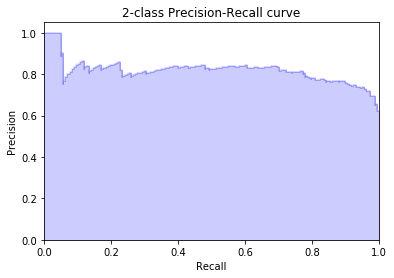

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score, mean_squared_error
from sklearn.utils.fixes import signature

scoreY = model.predict(testX)
precision, recall, _ = precision_recall_curve(testY, scoreY)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
# plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
#          average_precision))
plt.title('2-class Precision-Recall curve')